# Ejercicio 5 - guía 8

Se registró el consumo de electricidad (en kWh) por hora en seis oficinas de la facultad y se
obtuvieron los siguientes datos: [10.3, 9.5, 10.1, 9.7, 10.0, 9.6]. Asumiendo que el consumo sigue
una distribución normal N (𝜇, 𝜎^2), queremos estimar los parámetros 𝜇 y 𝜎 utilizando aproximación
por grilla. Asumimos priors uniformes 𝜇 ∼ U (8, 12) y log(𝜎^2 ) ∼ U ( log(0.01) , log(4) ).

## a)
Armar una grilla para 𝜇 y para 𝜎 con 200 valores cada una.

### Desarrollo

In [2]:
import numpy as np

grilla_mu = np.linspace(8, 12, 200)
grilla_sigma = np.linspace(0.1, 2, 200)

## b)
Obtener y graficar la posterior conjunta de ambos parámetros.

### Desarrollo

Primero obtengo los priors de mu y sigma, para luego considerarlos en conjunto:

In [3]:
# Ambos priors uniformes
prior_mu = np.ones(len(grilla_mu))
prior_sigma = np.ones(len(grilla_sigma)) / grilla_sigma**2

# Prior conjunto (matriz de 200x200)
prior_conjunto = np.outer(prior_mu, prior_sigma) 

Armo la likelihood conjunta:

In [4]:
from scipy.stats import norm

datos_ejercicio = np.array([10.3, 9.5, 10.1, 9.7, 10.0, 9.6]) 
cant_datos = len(datos_ejercicio)

likelihood = np.zeros((len(grilla_mu), len(grilla_sigma)))

for i, mu in enumerate(grilla_mu):
    for j, sigma in enumerate(grilla_sigma):
        likelihood[i, j] = np.prod(norm.pdf(datos_ejercicio, loc=mu, scale=sigma))

Y ahora finalmente obtengo la posterior:

In [5]:
posterior = likelihood * prior_conjunto
diferencial_mu = np.diff(grilla_mu)[0]
diferencial_sigma = np.diff(grilla_sigma)[0]
posterior /= np.sum(posterior*diferencial_mu*diferencial_sigma)

Y ahora hago un gráfico de la posterior conjunta obtenida:

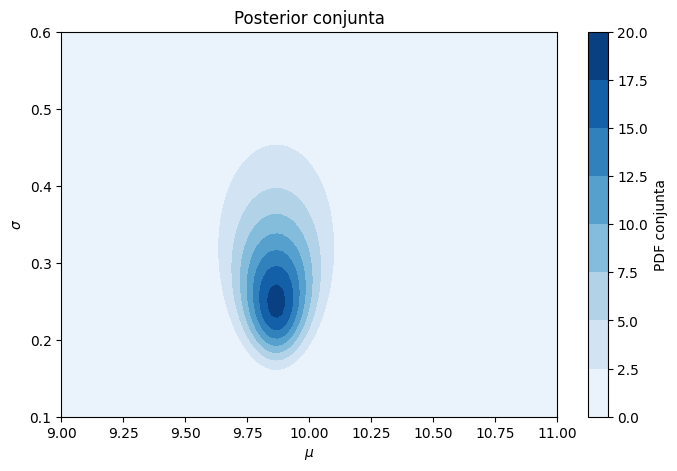

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.contourf(grilla_mu, grilla_sigma, posterior.T, cmap='Blues')
plt.colorbar(label='PDF conjunta')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')
plt.title('Posterior conjunta')
plt.xlim(9,11)
plt.ylim(0.1,0.6)
plt.show()

## c)
Obtener y graficar las distribuciones posteriores marginales de 𝜇 y 𝜎.

### Desarrollo

PAra obtener las posteriors marginales respectivas de cada parámetro **solo debo "integrar" (o sumar)** sobre todos los valores posibles del otro 
parámetro, de ese modo me quedaría una función que solo depende del parámetro que me interesa:

In [13]:
posterior_mu = np.sum(posterior*diferencial_sigma, axis=1)

posterior_sigma = np.sum(posterior*diferencial_mu, axis=0)

Ahora hago el gráfico de la posterior marginal de 𝜇:

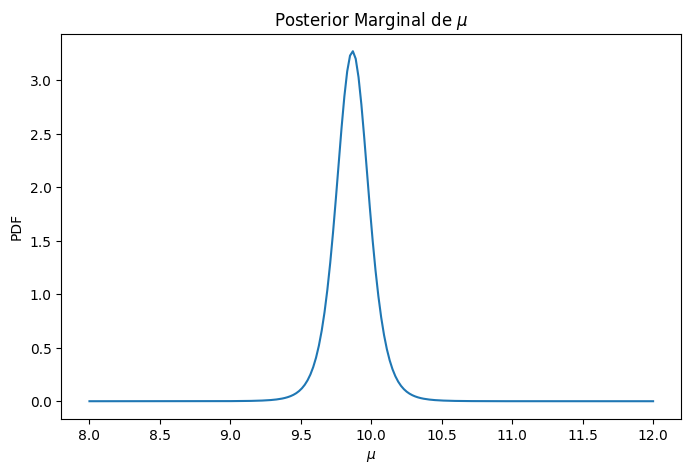

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(grilla_mu, posterior_mu, label=r'Posterior de $\mu$')
plt.xlabel(r'$\mu$')
plt.ylabel('PDF')
plt.title(r'Posterior Marginal de $\mu$')
plt.show()

Y el gráfico de la posterior marginal de 𝜎:

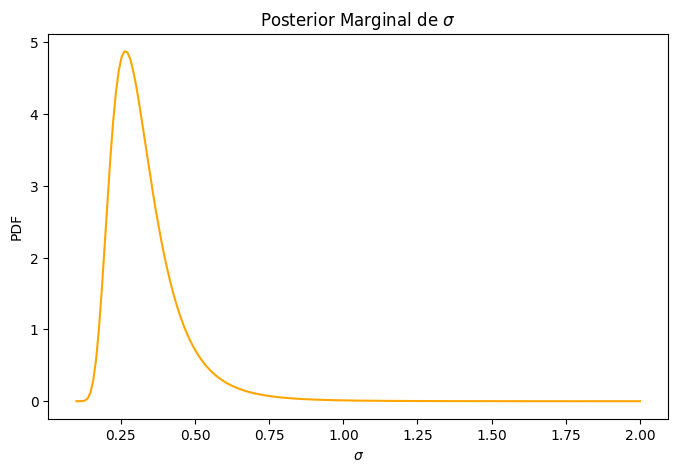

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(grilla_sigma, posterior_sigma, label=r'Posterior de $\sigma$', color='orange')
plt.xlabel(r'$\sigma$')
plt.ylabel('PDF')
plt.title(r'Posterior Marginal de $\sigma$')
plt.show()

## d)
Calcular intervalos 90%𝐻𝑃𝐷𝐼 para cada parámetro.

### Desarrollo

Primero tomo muestras de las posteriors marginales de cada uno:

In [19]:
samples_post_mu = np.random.choice(grilla_mu, size=10000, p= posterior_mu*diferencial_mu)
samples_post_sigma = np.random.choice(grilla_sigma, size=10000, p= posterior_sigma*diferencial_sigma)   

Y ahora calculo los **90%𝐻𝑃𝐷𝐼** para cada uno:

In [20]:
import arviz as az

print(f'90% HDPI mu: {az.hdi(samples_post_mu, hdi_prob=0.9)}')
print(f'90% HDPI sigma: {az.hdi(samples_post_sigma, hdi_prob=0.9)}')

90% HDPI mu: [ 9.66834171 10.11055276]
90% HDPI sigma: [0.16683417 0.47236181]
